The data contains over 12000 reviews of different app store applications by real users. The data also contains the rating that was given by them so it can be classified into positive or negative reviews. This is a good place to perform sentiment analysis tasks.

Target column is score between 1-5.

1-3:  poor reviews (negative)

4-5:  good  reviews (positive)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Read the dataset
df = pd.read_csv('/content/reviews.csv')

In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,score,thumbsUpCount
count,12495.000000,12495.000000
mean,3.094198,3.047459
std,1.457693,14.303903
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,4.000000,1.000000
max,5.000000,397.000000


In [ ]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId'],
      dtype='object')

In [ ]:
df= df.drop(['replyContent','repliedAt'],axis=1)

<Axes: >

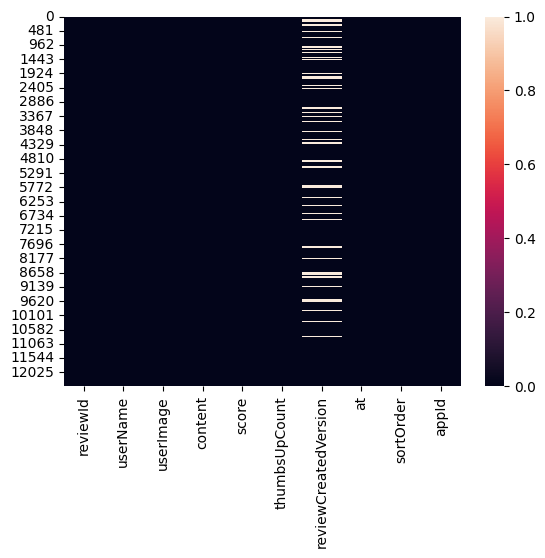

In [ ]:
sns.heatmap(df.isnull())

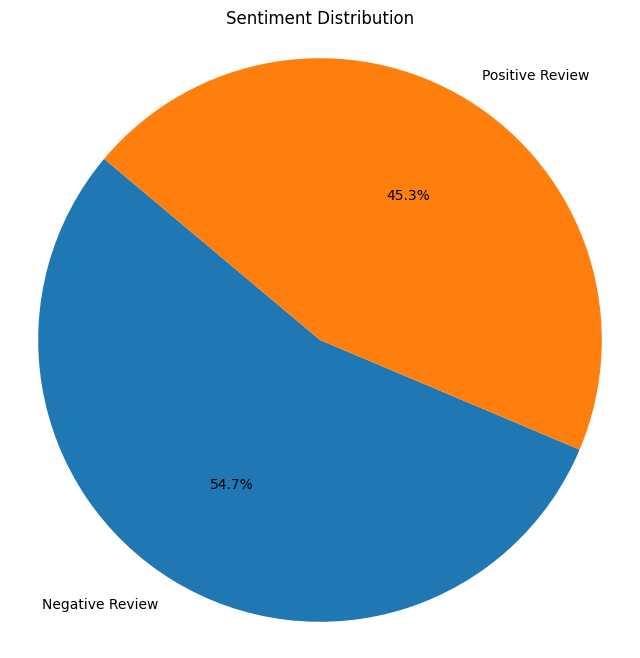

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'score' column contains the ratings 1-5
# Map the ratings to sentiment categories
sentiment_mapping = {1: 'Negative Review', 2: 'Negative Review', 3: 'Negative Review', 4: 'Positive Review', 5: 'Positive Review'}
sentiment_predictions = [sentiment_mapping.get(score, 'Unknown') for score in df['score']]

# Count the occurrences of each sentiment prediction
sentiment_counts = Counter(sentiment_predictions)

# Pie plot
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Sentiment Distribution')
plt.show()



In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
sortOrder               0
appId                   0
dtype: int64

In [ ]:
df.shape

(10333, 10)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Initialize stemmer
stemmer = PorterStemmer()

# Assuming df_new is your DataFrame containing text and scores
# Convert scores to binary (1 for good reviews, 0 for poor reviews)
df_new['sentiment'] = df_new['score'].apply(lambda x: 1 if x >= 4 else 0)

# Text preprocessing function
def preprocess_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Stemming
    tokens = [stemmer.stem(token) for token in tokens]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Add 'sentiment' column based on 'score' column
df['sentiment'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)

# Drop the original 'score' column
#df.drop('score', axis=1, inplace=True)


<ipython-input-500-53bfc6759e20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)


In [ ]:
df['length']= df['content'].apply(lambda x : len(x) )

In [ ]:
df = pd.DataFrame(data=df,columns=['content','length','score','sentiment'])

In [ ]:
df

,content,length,score,sentiment
0,I cannot open the app anymore,29,1,0
4,Dan Birthday Oct 28,19,1,0
5,It has changed how I viewed my different lists...,111,1,0
6,I'm only looking for a grocery list app but ev...,476,1,0
7,"Reset my free trial, new phone I'd like to see...",62,1,0
...,...,...,...,...
12489,its ok But we can not undestad repeated task s...,52,5,1
12490,"I really like the planner, it helps me achieve...",122,5,1
12492,Very useful apps. You must try it,33,5,1
12493,Would pay for this if there were even more add...,128,5,1


In [ ]:
df.shape

(10333, 4)

# **Data/Text Preprocessing**

1)  punctuation removing

2)  CountVectorizer



In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df['nopunc'] = df['content'].apply(lambda x: [a for a in x if a not in string.punctuation])

In [ ]:
df = pd.DataFrame(data=df,columns=['nopunc','length','score','sentiment'])

In [ ]:
df['nopunc'] = df['nopunc'].apply(''.join)


In [ ]:
df

,nopunc,length,score,sentiment
0,I cannot open the app anymore,29,1,0
4,Dan Birthday Oct 28,19,1,0
5,It has changed how I viewed my different lists...,111,1,0
6,Im only looking for a grocery list app but eve...,476,1,0
7,Reset my free trial new phone Id like to see i...,62,1,0
...,...,...,...,...
12489,its ok But we can not undestad repeated task s...,52,5,1
12490,I really like the planner it helps me achieve ...,122,5,1
12492,Very useful apps You must try it,33,5,1
12493,Would pay for this if there were even more add...,128,5,1


In [ ]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)


sentiment
0    5200
1    5133
Name: count, dtype: int64


In [ ]:
X=df['nopunc']
y=df['score']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X= cv.fit_transform(X)

#   **Feature Engineering**  &  **Model Training**
1) TF-IDF (Term Frequency-Inverse Document Frequency)

   - represent the text data numerically.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (7233, 12364)
Shape of X_test: (3100, 12364)
Shape of y_train: (7233,)
Shape of y_test: (3100,)


**1) SVM MODEL**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

pipeline1 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('svm', SVC(kernel='linear')),
])

X = df['nopunc']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameters grid
param_grid = {
    'svm__C': [ 0.01, 0.1, 1, 10],  # regularization parameter
}

# Perform Grid Search
grid_search1 = GridSearchCV(pipeline1, param_grid, cv=5, scoring='accuracy')
grid_search1.fit(X_train, y_train)

print("Best Parameters:", grid_search1.best_params_)
print("Best Score:", grid_search1.best_score_)

# Make predictions on the test set
y_pred = grid_search1.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'svm__C': 1}
Best Score: 0.8177806708399407
Accuracy: 0.8238709677419355
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1555
           1       0.84      0.81      0.82      1545

    accuracy                           0.82      3100
   macro avg       0.82      0.82      0.82      3100
weighted avg       0.82      0.82      0.82      3100



In [ ]:
import time

# Measure time taken for training
start_train_time = time.time()
grid_search1.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Measure time taken for testing
start_test_time = time.time()
y_pred = grid_search1.predict(X_test)
end_test_time = time.time()
test_time = end_test_time - start_test_time

# Print the time complexity
print("Training Time (s):", train_time)
print("Testing Time (s):", test_time)


Training Time (s): 162.4359471797943
Testing Time (s): 2.6222925186157227


# **2. Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Define the pipeline for Naive Bayes
nb_pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('nb', MultinomialNB()),  # Naive Bayes classifier
])

# Fit the Naive Bayes model
nb_pipeline.fit(X_train, y_train)

# Make predictions on the test set using Naive Bayes
nb_y_pred = nb_pipeline.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, nb_y_pred)
print("Accuracy for Naive Bayes:", accuracy_nb)
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, nb_y_pred))


Accuracy for Naive Bayes: 0.8045161290322581
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1555
           1       0.87      0.72      0.79      1545

    accuracy                           0.80      3100
   macro avg       0.81      0.80      0.80      3100
weighted avg       0.81      0.80      0.80      3100



In [ ]:
import time

# Measure time taken for training
start_train_time = time.time()
nb_pipeline.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Measure time taken for testing
start_test_time = time.time()
nb_y_pred = nb_pipeline.predict(X_test)
end_test_time = time.time()
test_time = end_test_time - start_test_time

# Print the time complexity
print("Training Time (s):", train_time)
print("Testing Time (s):", test_time)


Training Time (s): 0.19950032234191895
Testing Time (s): 0.07430744171142578


# **3. Random Forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline for Random Forest
rf_pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),  # Random Forest classifier
])

# Fit the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set using Random Forest
rf_y_pred = rf_pipeline.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, rf_y_pred)
print("Accuracy for Random Forest:", accuracy_rf)
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_y_pred))


Accuracy for Random Forest: 0.7935483870967742
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1555
           1       0.84      0.72      0.78      1545

    accuracy                           0.79      3100
   macro avg       0.80      0.79      0.79      3100
weighted avg       0.80      0.79      0.79      3100



In [ ]:
import time

# Measure time taken for training
start_train_time = time.time()
rf_pipeline.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Measure time taken for testing
start_test_time = time.time()
rf_y_pred = rf_pipeline.predict(X_test)
end_test_time = time.time()
test_time = end_test_time - start_test_time

# Print the time complexity
print("Training Time (s):", train_time)
print("Testing Time (s):", test_time)


Training Time (s): 10.086821794509888
Testing Time (s): 0.22071242332458496


# **4. Logistic Regression**
(using gridSearchCV)



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Define preprocessing steps for text data
text_preprocessor = Pipeline([
    ('count_vectorizer', CountVectorizer()),  # strings to token integer counts
    ('tfidf_transformer', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
])

# Define column transformer to apply preprocessing to text column only
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_preprocessor, 'nopunc')
    ]
)

# Define the pipeline
pipeline4 = Pipeline([
    ('preprocessor', preprocessor),
    ('logistic', LogisticRegression(max_iter=1000, solver='lbfgs')),  # logistic regression classifier with lbfgs solver
])

X = df[['nopunc']]  # Use double brackets to keep X as DataFrame
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Define hyperparameters grid
param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],  # regularization parameter
    'logistic__penalty': ['l2'],  # regularization type (only l2 penalty for lbfgs solver)
}

# Perform Grid Search
grid_search4 = GridSearchCV(pipeline4, param_grid, cv=5, scoring='accuracy')
grid_search4.fit(X_train, y_train)

print("Best Parameters:", grid_search4.best_params_)
print("Best Score:", grid_search4.best_score_)

# Make predictions on the test set
y_pred = grid_search4.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lr)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'logistic__C': 1, 'logistic__penalty': 'l2'}
Best Score: 0.8285650379809996
Accuracy: 0.8129032258064516
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1569
           1       0.81      0.81      0.81      1531

    accuracy                           0.81      3100
   macro avg       0.81      0.81      0.81      3100
weighted avg       0.81      0.81      0.81      3100



In [ ]:
import time

# Measure the time taken for training and testing
start_train_time = time.time()
grid_search4.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred = grid_search4.predict(X_test)
end_test_time = time.time()

# Calculate the training and testing times
train_time = end_train_time - start_train_time
test_time = end_test_time - start_test_time

# Print the time complexity
print("Training Time (s):", train_time)
print("Testing Time (s):", test_time)


Training Time (s): 13.433034896850586
Testing Time (s): 0.1446385383605957


In [ ]:
from tabulate import tabulate

# Define accuracies
accuracies = {
    'Model': ['Logistic Regression ', 'SVM ','Random Forest','Navie Byes' ],
    'Accuracy (%)': [accuracy_lr * 100, accuracy_svm * 100, accuracy_rf * 100,
                     accuracy_nb * 100]
}

# Print table
print(tabulate(accuracies, headers='keys', tablefmt='grid'))



+---------------------+----------------+
| Model               |   Accuracy (%) |
+=====================+================+
| Logistic Regression |        81.2903 |
+---------------------+----------------+
| SVM                 |        82.3871 |
+---------------------+----------------+
| Random Forest       |        79.3548 |
+---------------------+----------------+
| Navie Byes          |        80.4516 |
+---------------------+----------------+


In [ ]:
# Find maximum and minimum accuracies
max_accuracy = max(accuracies['Accuracy (%)'])
min_accuracy = min(accuracies['Accuracy (%)'])

# Find models with maximum and minimum accuracies
max_model = accuracies['Model'][accuracies['Accuracy (%)'].index(max_accuracy)]
min_model = accuracies['Model'][accuracies['Accuracy (%)'].index(min_accuracy)]

# Print maximum and minimum accuracies and corresponding models
print("Maximum Accuracy:", max_accuracy, "% (Model:", max_model, ")")
print("Minimum Accuracy:", min_accuracy, "% (Model:", min_model, ")")

Maximum Accuracy: 82.38709677419355 % (Model: SVM  )
Minimum Accuracy: 79.35483870967742 % (Model: Random Forest )


In [ ]:
# Define user input
user_input = "I cannot open the app anymore."

# Preprocess the user input
preprocessed_input = preprocess_text(user_input)

# Predict sentiment using the pre-trained Naive Bayes model
predicted_sentiment = nb_pipeline.predict([preprocessed_input])[0]

# Output predicted sentiment
if predicted_sentiment == 1:
    print("The sentiment of the input text is positive.")
else:
    print("The sentiment of the input text is negative.")


The sentiment of the input text is negative.


In [ ]:
# Define user input
user_input = "I love this app"

# Preprocess the user input
preprocessed_input = preprocess_text(user_input)

# Predict sentiment using the pre-trained Naive Bayes model
predicted_sentiment = nb_pipeline.predict([preprocessed_input])[0]

# Output predicted sentiment
if predicted_sentiment == 1:
    print("The sentiment of the input text is positive.")
else:
    print("The sentiment of the input text is negative.")


The sentiment of the input text is positive.


In [ ]:
from tabulate import tabulate

# Define the data
data = [
    ("Logistic Regression", 13.433, 0.144),
    ("Support Vector Machine", 162.436, 2.622),
    ("Random Forest", 10.087, 0.221),
    ("Naive Bayes", 0.200, 0.074)
]

# Print the table
print(tabulate(data, headers=["Model", "Training Time (s)", "Testing Time (s)"], tablefmt="grid"))


+------------------------+---------------------+--------------------+
| Model                  |   Training Time (s) |   Testing Time (s) |
+========================+=====================+====================+
| Logistic Regression    |              13.433 |              0.144 |
+------------------------+---------------------+--------------------+
| Support Vector Machine |             162.436 |              2.622 |
+------------------------+---------------------+--------------------+
| Random Forest          |              10.087 |              0.221 |
+------------------------+---------------------+--------------------+
| Naive Bayes            |               0.2   |              0.074 |
+------------------------+---------------------+--------------------+
